<a href="https://colab.research.google.com/github/Pipo0603/ExerciseAI/blob/main/Week6_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


47.75045435481619


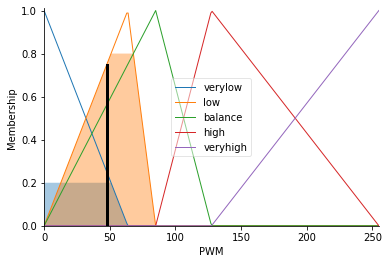

In [11]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
setpoint=ctrl.Antecedent(np.arange(12,33,1),'setpoint')
sensor=ctrl.Antecedent(np.arange(-3,61,1),'sensor')
PWM=ctrl.Consequent(np.arange(0,256,1),'PWM')


sensor['VS']=fuzz.trimf(sensor.universe,[-3,-3,31.5])
sensor['S']=fuzz.trimf(sensor.universe,[-3,15.75,31.5])
sensor['M']=fuzz.trimf(sensor.universe,[15.75,31.5,47.25])
sensor['H']=fuzz.trimf(sensor.universe,[31.5,47.25,60])
sensor['VH']=fuzz.trimf(sensor.universe,[47.25,60,60])

setpoint['short']=fuzz.trimf(setpoint.universe,[12,12,22])
setpoint['medium']=fuzz.trimf(setpoint.universe,[12,22,32])
setpoint['high']=fuzz.trimf(setpoint.universe,[22,32,32])

PWM['verylow']=fuzz.trimf(PWM.universe,[0,0,255/4])
PWM['low']=fuzz.trimf(PWM.universe,[0,255/4,255/3])
PWM['balance']=fuzz.trimf(PWM.universe,[0,255/3,255/2])
PWM['high']=fuzz.trimf(PWM.universe,[255/3,255/2,255])
PWM['veryhigh']=fuzz.trimf(PWM.universe,[255/2,255,255])


rule1=ctrl.Rule(sensor['VS']&setpoint['short'],PWM['verylow'])
rule2=ctrl.Rule(sensor['VS']&setpoint['medium'],PWM['low'])
rule3=ctrl.Rule(sensor['VS']&setpoint['high'],PWM['balance'])
rule4=ctrl.Rule(sensor['S']&setpoint['short'],PWM['low'])
rule5=ctrl.Rule(sensor['S']&setpoint['medium'],PWM['low'])
rule6=ctrl.Rule(sensor['S']&setpoint['high'],PWM['balance'])
rule7=ctrl.Rule(sensor['M']&setpoint['short'],PWM['low'])
rule8=ctrl.Rule(sensor['M']&setpoint['medium'],PWM['balance'])
rule9=ctrl.Rule(sensor['M']&setpoint['high'],PWM['high'])
rule10=ctrl.Rule(sensor['H']&setpoint['short'],PWM['balance'])
rule11=ctrl.Rule(sensor['H']&setpoint['medium'],PWM['high'])
rule12=ctrl.Rule(sensor['H']&setpoint['high'],PWM['high'])
rule13=ctrl.Rule(sensor['VH']&setpoint['short'],PWM['balance'])
rule14=ctrl.Rule(sensor['VH']&setpoint['medium'],PWM['veryhigh'])
rule15=ctrl.Rule(sensor['VH']&setpoint['high'],PWM['veryhigh'])
PWMING_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
PWMING = ctrl.ControlSystemSimulation(PWMING_ctrl)
PWMING.input['sensor']=14
PWMING.input['setpoint']=20
PWMING.compute()
print(PWMING.output['PWM'])
PWM.view(sim=PWMING)